In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import xgboost as xgb

In [5]:
import pandas as pd

data=pd.read_csv(r"...\Dataset\alzheimer.csv")
# Create a copy for visualization
data_copy = data.copy()

# Convert specific columns to categorical
data_copy["Group"] = pd.Categorical(data_copy["Group"])
data_copy["M/F"] = pd.Categorical(data_copy["M/F"])
data_copy["SES"] = pd.Categorical(data_copy["SES"])
data_copy["CDR"] = pd.Categorical(data_copy["CDR"])
data_copy["EDUC"] = pd.Categorical(data_copy["EDUC"])
data_copy["Age"] = pd.Categorical(data_copy["Age"])

# Select columns of specific types for further processing
df = data_copy.select_dtypes(include=["float64", "int64", "int32"])


In [6]:
data_copy

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [7]:
df

,MMSE,eTIV,nWBV,ASF
0,27.0,1987,0.696,0.883
1,30.0,2004,0.681,0.876
2,23.0,1678,0.736,1.046
3,28.0,1738,0.713,1.010
4,22.0,1698,0.701,1.034
...,...,...,...,...
368,28.0,1693,0.694,1.037
369,26.0,1688,0.675,1.040
370,30.0,1319,0.801,1.331
371,30.0,1327,0.796,1.323


In [8]:
data.head(5)

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [9]:
print(data.shape)

(373, 10)


In [10]:
print(data.columns)

Index(['Group', 'M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB
None


In [12]:
data.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [13]:
print(data.describe().T)

      count         mean         std       min       25%       50%       75%  \
Age   373.0    77.013405    7.640957    60.000    71.000    77.000    82.000   
EDUC  373.0    14.597855    2.876339     6.000    12.000    15.000    16.000   
SES   354.0     2.460452    1.134005     1.000     2.000     2.000     3.000   
MMSE  371.0    27.342318    3.683244     4.000    27.000    29.000    30.000   
CDR   373.0     0.290885    0.374557     0.000     0.000     0.000     0.500   
eTIV  373.0  1488.128686  176.139286  1106.000  1357.000  1470.000  1597.000   
nWBV  373.0     0.729568    0.037135     0.644     0.700     0.729     0.756   
ASF   373.0     1.195461    0.138092     0.876     1.099     1.194     1.293   

           max  
Age     98.000  
EDUC    23.000  
SES      5.000  
MMSE    30.000  
CDR      2.000  
eTIV  2004.000  
nWBV     0.837  
ASF      1.587  


In [14]:
print(data.groupby(["Group","SES"])["MMSE"].mean())

Group        SES
Converted    1.0    28.619048
             2.0    28.571429
             3.0    29.142857
             4.0    28.000000
Demented     1.0    23.884615
             2.0    24.480000
             3.0    25.545455
             4.0    23.657895
             5.0    22.800000
Nondemented  1.0    29.439024
             2.0    29.281690
             3.0    28.904762
             4.0    29.323529
             5.0    28.000000
Name: MMSE, dtype: float64


In [15]:
print(data.groupby(["Group","SES"])["eTIV"].mean())

Group        SES
Converted    1.0    1495.666667
             2.0    1379.142857
             3.0    1413.285714
             4.0    1518.500000
Demented     1.0    1677.153846
             2.0    1492.360000
             3.0    1411.757576
             4.0    1450.973684
             5.0    1335.800000
Nondemented  1.0    1542.707317
             2.0    1499.140845
             3.0    1471.666667
             4.0    1467.088235
             5.0    1382.000000
Name: eTIV, dtype: float64


In [16]:
print(data.groupby(["Group","SES"])["nWBV"].mean())

Group        SES
Converted    1.0    0.714238
             2.0    0.725143
             3.0    0.731571
             4.0    0.791000
Demented     1.0    0.714423
             2.0    0.719360
             3.0    0.714091
             4.0    0.714553
             5.0    0.710200
Nondemented  1.0    0.719220
             2.0    0.741803
             3.0    0.765452
             4.0    0.734088
             5.0    0.753500
Name: nWBV, dtype: float64


In [17]:
print(data.groupby(["Group","SES"])["ASF"].mean())

Group        SES
Converted    1.0    1.186524
             2.0    1.272857
             3.0    1.245857
             4.0    1.155500
Demented     1.0    1.057308
             2.0    1.186680
             3.0    1.249758
             4.0    1.220421
             5.0    1.332400
Nondemented  1.0    1.150878
             2.0    1.190380
             3.0    1.211500
             4.0    1.211088
             5.0    1.269500
Name: ASF, dtype: float64


In [18]:
print(data.groupby(["Group","CDR"])["MMSE"].mean())

Group        CDR
Converted    0.0    29.055556
             0.5    28.315789
Demented     0.5    25.960784
             1.0    21.051282
             2.0    20.333333
Nondemented  0.0    29.239362
             0.5    28.000000
Name: MMSE, dtype: float64


In [19]:
print(data.groupby(["Group","CDR"])["eTIV"].mean())

Group        CDR
Converted    0.0    1425.722222
             0.5    1491.052632
Demented     0.5    1479.382353
             1.0    1498.121951
             2.0    1538.000000
Nondemented  0.0    1492.712766
             0.5    1757.500000
Name: eTIV, dtype: float64


In [20]:
print(data.groupby(["Group","CDR"])["nWBV"].mean())

Group        CDR
Converted    0.0    0.735111
             0.5    0.712947
Demented     0.5    0.722235
             1.0    0.702244
             2.0    0.706667
Nondemented  0.0    0.740963
             0.5    0.735000
Name: nWBV, dtype: float64


In [21]:
print(data.groupby(["Group","CDR"])["ASF"].mean())

Group        CDR
Converted    0.0    1.239000
             0.5    1.187211
Demented     0.5    1.202520
             1.0    1.186390
             2.0    1.149000
Nondemented  0.0    1.193096
             0.5    1.000000
Name: ASF, dtype: float64


In [22]:
print(data["Group"].value_counts())

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64


In [23]:
print(data["EDUC"].value_counts())

12    103
16     81
18     64
14     33
13     27
15     17
20     13
11     11
8       9
17      9
6       3
23      3
Name: EDUC, dtype: int64


In [24]:
print(data["M/F"].value_counts())

F    213
M    160
Name: M/F, dtype: int64


In [25]:
print(df.corr())

          MMSE      eTIV      nWBV       ASF
MMSE  1.000000 -0.032084  0.341912  0.040052
eTIV -0.032084  1.000000 -0.210122 -0.988877
nWBV  0.341912 -0.210122  1.000000  0.213476
ASF   0.040052 -0.988877  0.213476  1.000000


In [26]:
print(data.isnull().sum())

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


**Histograms**

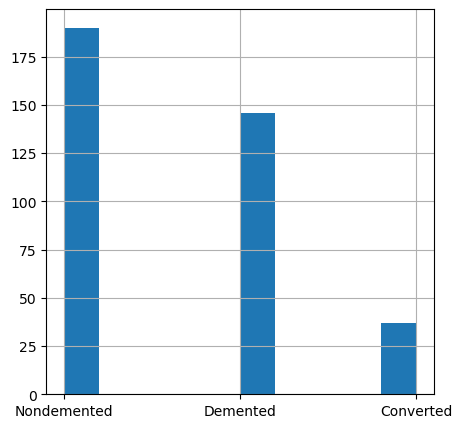

In [27]:
data["Group"].hist(figsize=(5,5))
plt.show()

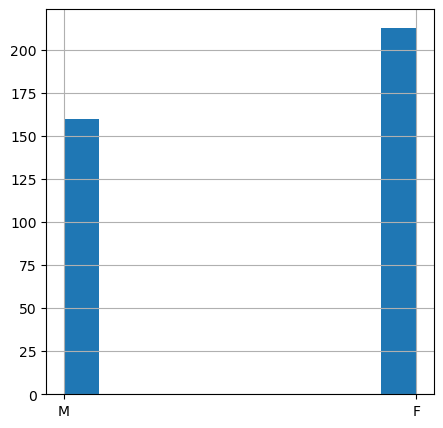

In [28]:
# For gender
data["M/F"].hist(figsize=(5,5))
plt.show()

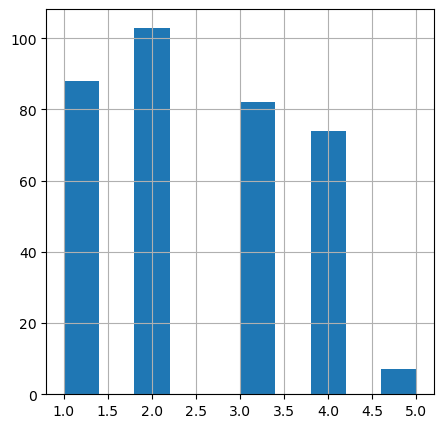

In [29]:
data["SES"].hist(figsize=(5,5))
plt.show()

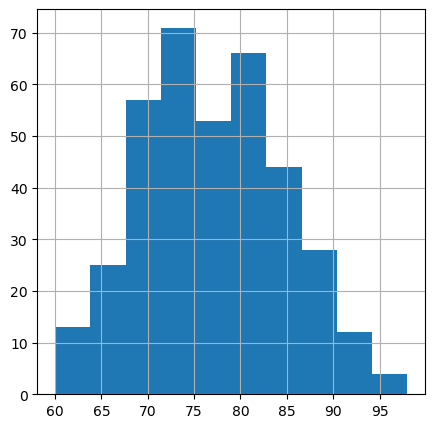

In [30]:
# For Age
data["Age"].hist(figsize=(5,5))
plt.show()

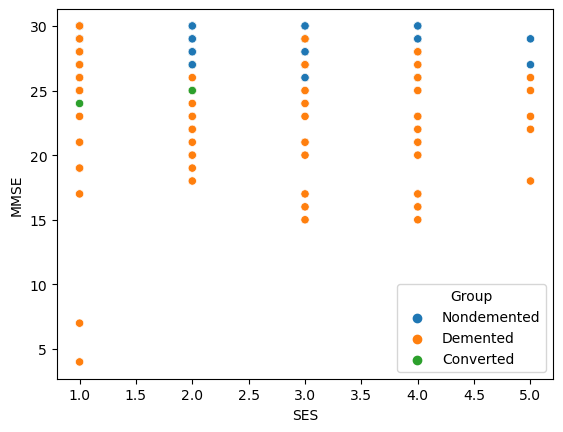

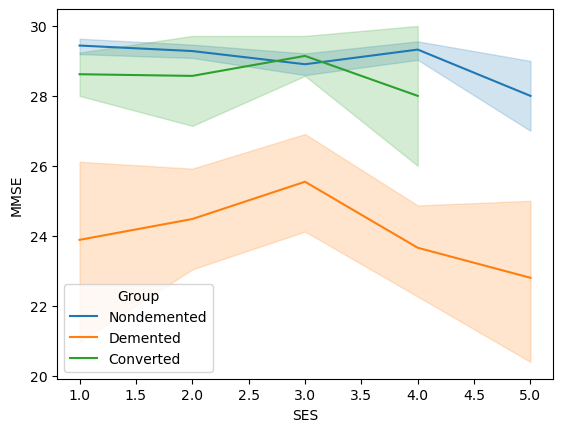

In [31]:
# scatter plot
sns.scatterplot(x="SES",y="MMSE",hue="Group",data=data)
plt.show()
sns.lineplot(x="SES", y="MMSE",hue="Group", data=data)
plt.show()

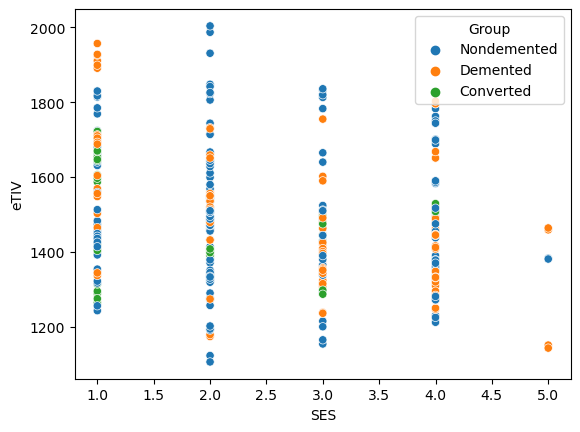

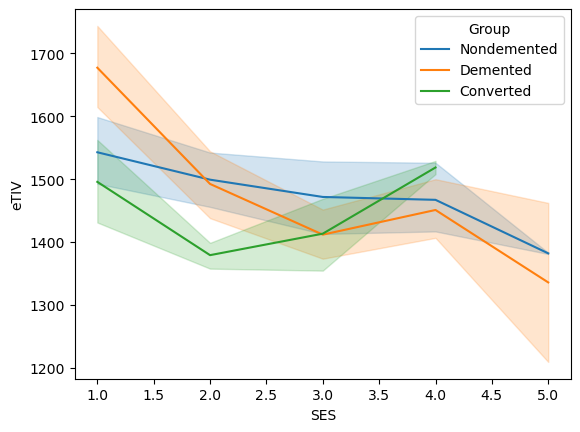

In [32]:
sns.scatterplot(x="SES",y="eTIV",hue="Group",data=data)
plt.show()
sns.lineplot(x="SES", y="eTIV",hue="Group", data=data)
plt.show()

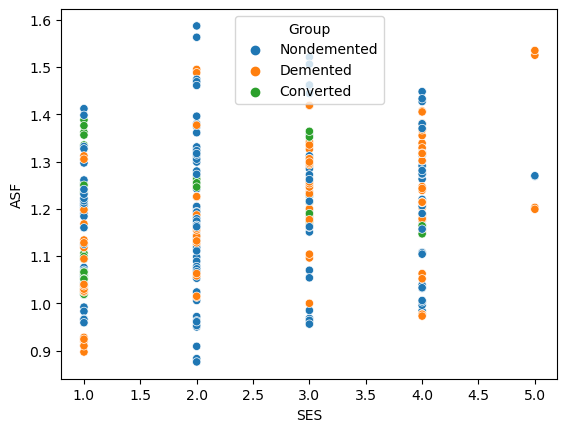

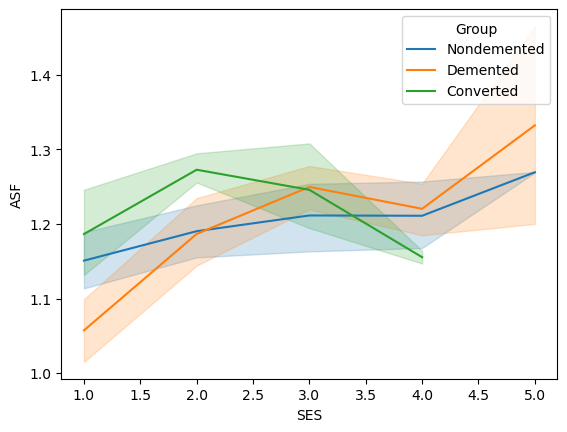

In [33]:
sns.scatterplot(x="SES",y="ASF",hue="Group",data=data)
plt.show()
sns.lineplot(x="SES", y="ASF",hue="Group", data=data)
plt.show()

In [34]:
Features = ["MMSE","eTIV","nWBV","ASF"]

In [35]:
corrPearson = data[Features].corr(method="pearson")

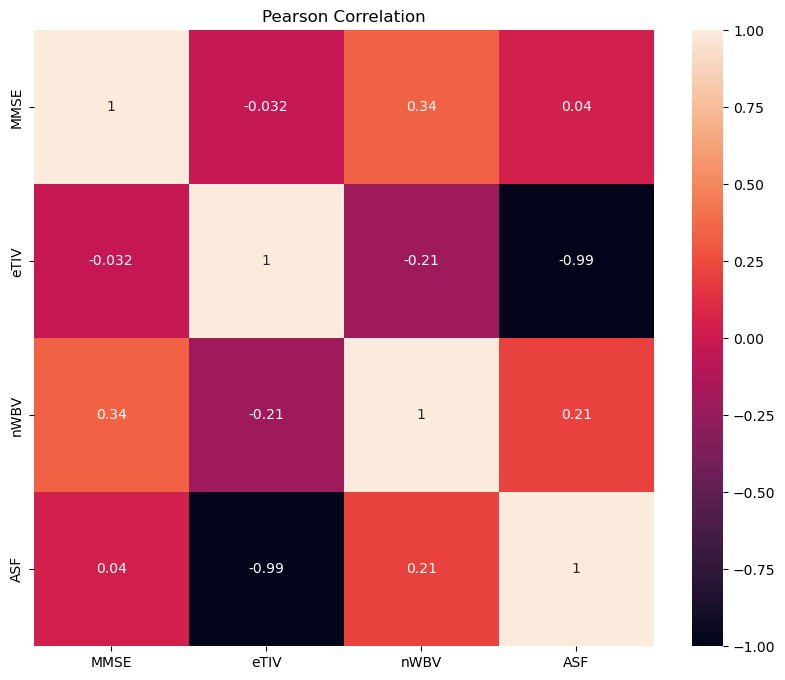

In [36]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True, vmin=-1, vmax=+1)

plt.title("Pearson Correlation")
plt.show()

In [37]:
data.columns = ['Group', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

In [38]:
Columns = ["Group","Gender"]
encode = LabelEncoder()
for i in Columns:
    print(data[i].value_counts())
    print("----")
    data[i] = encode.fit_transform(data[i])
    print(data[i].value_counts())

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64
----
2    190
1    146
0     37
Name: Group, dtype: int64
F    213
M    160
Name: Gender, dtype: int64
----
0    213
1    160
Name: Gender, dtype: int64


In [39]:
data.Gender = data.Gender.replace("M", 0)
data.Gender = data.Gender.replace("F", 1)
data.Group = data.Group.replace("Converted", 0)
data.Group = data.Group.replace("Demented", 1)
data.Group = data.Group.replace("Nondemented", 2)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    int32  
 1   Gender  373 non-null    int32  
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 26.4 KB
None


In [40]:
#replacing null values
data["SES"].fillna(data["SES"].mean(), inplace=True)
data["MMSE"].fillna(data["MMSE"].mean(), inplace=True)
print(data.isnull().sum())

Group     0
Gender    0
Age       0
EDUC      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64


In [41]:
#splitting data into dependant and independant grps
x = data.drop("Group",axis=1)
y = data["Group"]

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.20,random_state=42)

In [42]:
print(len(xTrain))
print(len(yTrain))

298
298


In [43]:
print(xTrain.shape)
print(yTrain.shape)

(298, 9)
(298,)


In [44]:
# #DECISION TREE
# #Before Tuning
# print("Results from Decision Tree Classifier before tuning")
# Deci_Tree1 = DecisionTreeClassifier().fit(xTrain,yTrain)
# predict1 = Deci_Tree1.predict(xTrain)

# #accuracy score
# print("Accuracy Score: ", accuracy_score(yTrain,predict1))

# #cross validation
# CV = cross_val_score(Deci_Tree1,xTrain,yTrain,cv=10).mean()
# print("Cross Validation score : ",CV);

# print("==============Results from Decision Tree Classifier after tuning==============")
# Deci_Tree_Tuned1 = DecisionTreeClassifier(max_depth=1,min_samples_split=2).fit(xTrain,yTrain)
# predict_tuned1 = Deci_Tree_Tuned1.predict(xTrain)
# print("Accuracy Score: ", accuracy_score(yTrain, predict_tuned1))
# CVtuned = cross_val_score(Deci_Tree_Tuned1,xTrain,yTrain,cv=10).mean()
# print("Cross Validaition Score: ",CVtuned)

In [45]:
import warnings
warnings.filterwarnings('ignore')
#DECISION TREE
#Before Tuning
print("Results from Decision Tree Classifier before tuning")
Deci_Tree = DecisionTreeClassifier().fit(xTrain,yTrain)
predict = Deci_Tree.predict(xTest)

#accuracy score
print("Accuracy Score: ", accuracy_score(yTest,predict))

#cross validation
CV = cross_val_score(Deci_Tree,xTest,yTest,cv=10).mean()
print("Cross Validation score : ",CV);

print("==============Results from Decision Tree Classifier after tuning==============")
Deci_Tree_Tuned = DecisionTreeClassifier(max_depth=1,min_samples_split=2).fit(xTrain,yTrain)
predict_tuned = Deci_Tree_Tuned.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest,predict_tuned))
CVtuned = cross_val_score(Deci_Tree_Tuned,xTest,yTest,cv=10).mean()
print("Cross Validaition Score: ",CVtuned)

Results from Decision Tree Classifier before tuning
Accuracy Score:  0.84
Cross Validation score :  0.7874999999999999
==============Results from Decision Tree Classifier after tuning==============
Accuracy Score:  0.84
Cross Validaition Score:  0.8392857142857142


In [46]:
# print("Results from XGB Classifier before tuning")
# xgbc1 = XGBClassifier(verbose=False).fit(xTrain, yTrain)
# predict2 = xgbc1.predict(xTrain)
# print("Accuracy Score: ", accuracy_score(yTest, predict))
# CV = cross_val_score(xgbc1, xTrain, yTrain, cv=10).mean()
# print("Cross Validation Score: ", CV)

# print("==============Results from XGB Classifier after tuning==============")
# xgbc_tuned1 = XGBClassifier(learning_rate=0.01, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8).fit(xTrain, yTrain)
# predict_tuned1 = xgbc_tuned1.predict(xTrain)
# print("Accuracy Score: ", accuracy_score(yTrain, predict_tuned1))
# CVtuned = cross_val_score(xgbc_tuned1,xTrain,yTrain,cv=10).mean()
# print("Cross Validation Score: ", CVtuned)

In [47]:
print("Results from XGB Classifier before tuning")
xgbc = XGBClassifier(verbose=False).fit(xTrain, yTrain)
predict3 = xgbc.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest, predict3))
CV = cross_val_score(xgbc, xTest, yTest, cv=10).mean()
print("Cross Validation Score: ", CV)

print("==============Results from XGB Classifier after tuning==============")
xgbc_tuned = XGBClassifier(learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8).fit(xTrain, yTrain)
predict_tuned = xgbc_tuned.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest, predict_tuned))
CVtuned = cross_val_score(xgbc_tuned,xTest,yTest,cv=10).mean()
print("Cross Validation Score: ", CVtuned)

Results from XGB Classifier before tuning
Accuracy Score:  0.8533333333333334
Cross Validation Score:  0.8410714285714285
==============Results from XGB Classifier after tuning==============
Accuracy Score:  0.8533333333333334
Cross Validation Score:  0.8410714285714285


----------------------------
DecisionTreeClassifier: 
Accuracy: 0.84
----------------------------
XGBClassifier: 
Accuracy: 0.8533333333333334


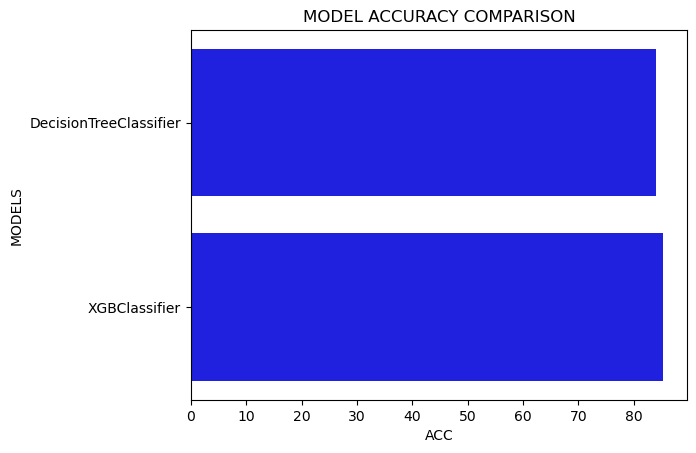

In [48]:
models = [Deci_Tree_Tuned,xgbc]
r = pd.DataFrame(columns=["MODELS","ACC"])

for model in models:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    accuracy = accuracy_score(yTest, predict)
    print("-" * 28)
    print(name + ": ")
    print(f"Accuracy: {accuracy}")
    result = pd.DataFrame([[name,accuracy*100]],columns=["MODELS","ACC"])
    r = r.append(result)

sns.barplot(x="ACC",y="MODELS",data=r,color="b")
plt.xlabel("ACC")
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

In [49]:
print("Results from XGB Classifier before tuning")
xgbc = XGBClassifier(verbose=False).fit(xTrain, yTrain)
predict3 = xgbc.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest, predict3))
CV = cross_val_score(xgbc, xTest, yTest, cv=10).mean()
print("Cross Validation Score: ", CV)

print("==============Results from XGB Classifier after tuning==============")
xgbc_tuned = XGBClassifier(learning_rate=0.001, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8).fit(xTrain, yTrain)
predict_tuned = xgbc_tuned.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest, predict_tuned))
CVtuned = cross_val_score(xgbc_tuned,xTest,yTest,cv=10).mean()
print("Cross Validation Score: ", CVtuned)

Results from XGB Classifier before tuning
Accuracy Score:  0.8533333333333334
Cross Validation Score:  0.8410714285714285
==============Results from XGB Classifier after tuning==============
Accuracy Score:  0.84
Cross Validation Score:  0.7999999999999999


In [52]:
print("Results from XGB Classifier before tuning")
r = RandomForestClassifier(verbose=False).fit(xTrain, yTrain)
p3 = xgbc.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest, p3))
CV = cross_val_score(r, xTest, yTest, cv=10).mean()
print("Cross Validation Score: ", CV)

print("==============Results from XGB Classifier after tuning==============")
r_tuned = RandomForestClassifier(max_depth=6, min_samples_split=2, n_estimators=100).fit(xTrain, yTrain)
pr_tuned = r_tuned.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest, pr_tuned))
CVtuned = cross_val_score(r_tuned,xTest,yTest,cv=10).mean()
print("Cross Validation Score: ", CVtuned)

Results from XGB Classifier before tuning
Accuracy Score:  0.8533333333333334
Cross Validation Score:  0.8267857142857142
==============Results from XGB Classifier after tuning==============
Accuracy Score:  0.8533333333333334
Cross Validation Score:  0.8392857142857142


In [53]:
print("Results from XGB Classifier before tuning")
xgbc = XGBClassifier(verbose=True).fit(xTrain, yTrain)
predict3 = xgbc.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest, predict3))
CV = cross_val_score(xgbc, xTest, yTest, cv=10).mean()
print("Cross Validation Score: ", CV)

print("==============Results from XGB Classifier after tuning==============")
xgbc_tuned = XGBClassifier(learning_rate=0.1, max_depth=6, min_samples_split=2, n_estimators=100, subsample=0.8).fit(xTrain, yTrain)
predict_tuned = xgbc_tuned.predict(xTest)
print("Accuracy Score: ", accuracy_score(yTest, predict_tuned))
CVtuned = cross_val_score(xgbc_tuned,xTest,yTest,cv=10).mean()
print("Cross Validation Score: ", CVtuned)

Results from XGB Classifier before tuning
Accuracy Score:  0.8533333333333334
Cross Validation Score:  0.8410714285714285
==============Results from XGB Classifier after tuning==============
Accuracy Score:  0.8533333333333334
Cross Validation Score:  0.8410714285714285
